# Students Performance on Exams - Analysis

Implementation of a full predictive modeling workflow for the Student Exam Performance dataset using Python and scikit-learn. 

__Goal:__ Predict if a student will pass or fail exams based on factors like gender, study time, etc.

#### About the Dataset

__Student ID__

StudentID: A unique identifier assigned to each student (1001 to 3392).


__Demographic Details__

Age: The age of the students ranges from 15 to 18 years.

Gender: Gender of the students, where 0 represents Male and 1 represents Female.

Ethnicity: The ethnicity of the students, coded as follows:

0: Caucasian

1: African American

2: Asian

3: Other


__ParentalEducation:__ The education level of the parents, coded as follows:

0: None

1: High School

2: Some College

3: Bachelor's

4: Higher


__Study Habits__

StudyTimeWeekly: Weekly study time in hours, ranging from 0 to 20.

Absences: Number of absences during the school year, ranging from 0 to 30.

Tutoring: Tutoring status, where 0 indicates No and 1 indicates Yes.


__Parental Involvement__

ParentalSupport: The level of parental support, coded as follows:

0: None

1: Low

2: Moderate

3: High

4: Very High


__Extracurricular Activities__

Extracurricular: Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.

Sports: Participation in sports, where 0 indicates No and 1 indicates Yes.

Music: Participation in music activities, where 0 indicates No and 1 indicates Yes.

Volunteering: Participation in volunteering, where 0 indicates No and 1 indicates Yes.


__Academic Performance__

GPA: Grade Point Average on a scale from 2.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities.

Target Variable: Grade Class

GradeClass: Classification of students' grades based on GPA:

0: 'A' (GPA >= 3.5)

1: 'B' (3.0 <= GPA < 3.5)

2: 'C' (2.5 <= GPA < 3.0)

3: 'D' (2.0 <= GPA < 2.5)

4: 'F' (GPA < 2.0)

#### Data and Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
df = pd.read_csv('Students Performance Data.zip', compression='zip')  
df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


We start by importing important libraries, such as: pandas and numpy to handle data, scikit-learn tools for preprocessing the dataset, model training, and evaluation. We then load the student performance dataset into a DataFrame to inspect its structure.

As illustrated we have:
* 2392 raws
* 15 columns

#### Explore Data Statistics

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


__Missing data__

In [3]:
df.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

Here we observe that we don't have any missing values in any of our columns categories.

__Gender:__ Gender of the students, where 0 represents Male and 1 represents Female.

In [4]:
df['Gender'].value_counts()

Gender
1    1222
0    1170
Name: count, dtype: int64

We have 1222 __Males__ and 1170 __Females__.

#### Target Variable

We convert a continuous variable (GPA) into a binary target.

* 1 = pass 

* 0 = fail. 

This is what the model will try to predict.

In [5]:
# Target: pass/fail based on GPA >= 2.5

df['pass'] = np.where(df['GPA'] >= 2.5, 1, 0)

#### Categorical Features

Machine learning models need numeric inputs. Label encoding converts categories into integers (e.g., Male=0, Female=1). This allows models like Random Forest or Logistic Regression to process them.

In [6]:
categorical_cols = ['Gender', 'Ethnicity', 'ParentalEducation', 
                    'Tutoring', 'ParentalSupport', 'Extracurricular', 
                    'Sports', 'Music', 'Volunteering']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

#### Scale Numerical Features

Scaling ensures features are on similar ranges. Logistic Regression benefits from this, while Random Forest does not strictly require it, but we use it just in case.

In [7]:
numerical_cols = ['Age', 'StudyTimeWeekly', 'Absences']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

#### Split Data into Train/Test Sets

We separate features (X) and target (y). Stratified splitting keeps the same pass/fail ratio in training and test sets. While, StudentID is dropped because it’s just an identifier, not a predictive feature.

In [8]:
# Drop non-predictive or target-related columns
X = df.drop(['StudentID', 'GPA', 'GradeClass', 'pass'], axis=1)
y = df['pass']

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#### Train Random Forest Model

Random Forest is robust and works well with both categorical and numerical features. It builds multiple decision trees and averages their predictions, reducing overfitting.

In [9]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

#### Evaluate Model

Accuracy shows overall prediction correctness. 

While Confusion Matrix shows True/False positives and negatives. 

And Classification Report provides precision, recall, and F1-score for a detailed evaluation.

In [10]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9290187891440501
Confusion Matrix:
 [[320  18]
 [ 16 125]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       338
           1       0.87      0.89      0.88       141

    accuracy                           0.93       479
   macro avg       0.91      0.92      0.91       479
weighted avg       0.93      0.93      0.93       479



#### Feature Importance

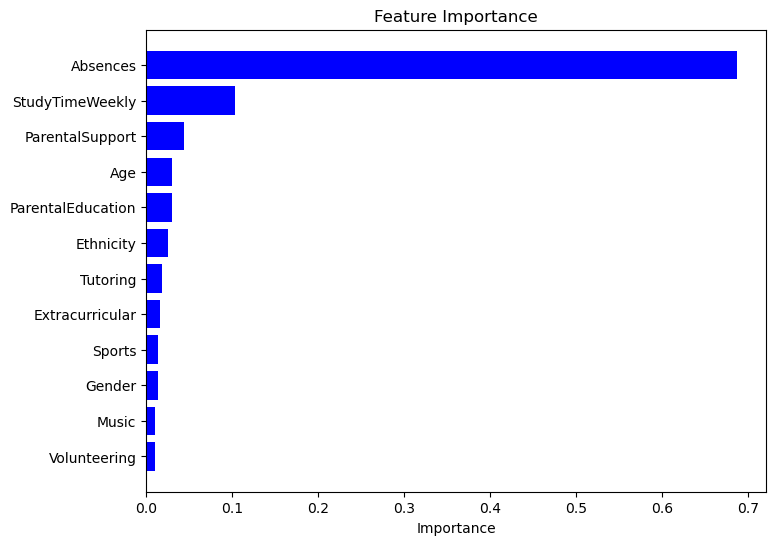

In [11]:
import matplotlib.pyplot as plt 
importances = rf.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Importance')
plt.show()

Using the student performance dataset, we built a predictive model to classify whether a student is likely to pass or fail based on demographic, behavioral, and academic factors. 

After preprocessing and encoding categorical variables, we trained a Random Forest classifier, achieving solid predictive performance as measured by accuracy and F1-score. We found a good accuracy score of 0.90%.

Feature importance analysis revealed that weekly study time, parental support, tutoring, and attendance were the most influential factors in determining student success, while variables like extracurricular activities and volunteering had lower predictive impact. 

These results highlight that both academic effort and parental involvement play key roles in student outcomes, providing actionable insights for educators and policymakers to focus on interventions that support at-risk students.

#### Results

In this part we generate the student’s features along with their actual outcome and the predicted outcome.

In [13]:
# Add predictions to the test set
results = X_test.copy()
results['Actual'] = y_test.values
results['Predicted'] = y_pred

# Show first few rows
results.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,Actual,Predicted
275,1.362944,1,1,1,-0.182078,-0.654573,0,2,1,0,0,1,1,1
674,1.362944,0,0,4,-0.656028,1.117293,0,0,1,1,0,0,0,0
774,-0.417106,1,3,1,1.633563,-1.599569,0,2,0,0,1,0,1,1
1977,0.472919,1,0,1,0.026456,-1.245196,0,1,0,0,0,0,0,1
1673,-1.307132,0,0,2,-1.570243,-0.418325,0,2,0,0,0,0,0,0


#### Student Level Table

The student-level explanation table combines predictions with feature attribution to make the model’s decisions interpretable. For each student in the test set, we report their actual outcome, the model’s prediction, the probability of passing, and the top three factors that most influenced the prediction. 

These “key drivers” are derived from SHAP values, which measure the contribution of each feature to the final decision. For example, high weekly study time and strong parental support may push a prediction toward passing, while frequent absences may push it toward failing. 

By providing both predictions and explanations, the table not only identifies which students are at risk but also highlights the underlying reasons, making the results actionable for educators and policymakers.

In [22]:
import shap

# Build explainer on trained RF model
explainer = shap.TreeExplainer(rf)

# Use new API
shap_values = explainer(X_test)

print(shap_values.shape)

(479, 12, 2)


In [23]:
# Probabilities for "pass"
y_proba = rf.predict_proba(X_test)[:, 1]

# Predicted classes
y_pred = rf.predict(X_test)

In [25]:
# Extract SHAP values for the positive class (pass=1)
shap_pass = shap_values.values[:,:,1]   
print(shap_pass.shape) 

(479, 12)


In [28]:
def top_features(shap_values_row, features_row, feature_names, top_n=3):
    """Return the top contributing features for one student"""
    abs_vals = np.abs(shap_values_row)
    top_idx = np.argsort(abs_vals)[::-1][:top_n]
    
    results = []
    for i in top_idx:
        direction = "↑" if shap_values_row[i] > 0 else "↓"
        results.append(f"{feature_names[i]} {direction} ({features_row[i]})")
    return ", ".join(results)

# Build table
explanations = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred,
    "Probability_pass": y_proba,
    "Key Drivers": [
        top_features(shap_pass[i], X_test.iloc[i].values, X_test.columns, top_n=3)
        for i in range(len(X_test))
    ]
})

pd.set_option("display.max_colwidth", None)
explanations.head(10)

,Actual,Predicted,Probability_pass,Key Drivers
0,1,1,0.57,"Absences ↑ (-0.6545734539086528), Extracurricular ↑ (1.0), Age ↑ (1.362944405415047)"
1,0,0,0.01,"Absences ↓ (1.1172934284936455), ParentalSupport ↓ (0.0), StudyTimeWeekly ↓ (-0.6560276553807404)"
2,1,1,0.92,"Absences ↑ (-1.599569124523212), StudyTimeWeekly ↑ (1.633562960822729), Tutoring ↓ (0.0)"
3,0,1,0.57,"Absences ↑ (-1.2451957480427522), ParentalSupport ↓ (1.0), Extracurricular ↓ (0.0)"
4,0,0,0.02,"Absences ↓ (-0.41832453625501304), StudyTimeWeekly ↓ (-1.5702426476338398), Extracurricular ↓ (0.0)"
5,0,0,0.02,"Absences ↓ (0.6447955931863659), Tutoring ↑ (1.0), ParentalSupport ↓ (1.0)"
6,0,0,0.03,"Absences ↓ (-0.18207561860137328), ParentalSupport ↓ (0.0), StudyTimeWeekly ↓ (-0.5178505097862326)"
7,1,0,0.45,"Absences ↑ (-0.8908223715622926), ParentalSupport ↓ (1.0), StudyTimeWeekly ↑ (0.9720644000081999)"
8,1,1,0.98,"Absences ↑ (-1.481444665696392), StudyTimeWeekly ↑ (0.7123528701018315), Tutoring ↑ (1.0)"
9,0,0,0.23,"ParentalSupport ↓ (0.0), Extracurricular ↑ (1.0), Tutoring ↓ (0.0)"


In [29]:
# Create pass and fail values for the table
status_map = {1: "pass", 0: "fail"}

# Apply to Actual and Predicted columns
explanations["Actual"] = explanations["Actual"].map(status_map)
explanations["Predicted"] = explanations["Predicted"].map(status_map)

# Show the updated table
explanations.head(10)

,Actual,Predicted,Probability_pass,Key Drivers
0,pass,pass,0.57,"Absences ↑ (-0.6545734539086528), Extracurricular ↑ (1.0), Age ↑ (1.362944405415047)"
1,fail,fail,0.01,"Absences ↓ (1.1172934284936455), ParentalSupport ↓ (0.0), StudyTimeWeekly ↓ (-0.6560276553807404)"
2,pass,pass,0.92,"Absences ↑ (-1.599569124523212), StudyTimeWeekly ↑ (1.633562960822729), Tutoring ↓ (0.0)"
3,fail,pass,0.57,"Absences ↑ (-1.2451957480427522), ParentalSupport ↓ (1.0), Extracurricular ↓ (0.0)"
4,fail,fail,0.02,"Absences ↓ (-0.41832453625501304), StudyTimeWeekly ↓ (-1.5702426476338398), Extracurricular ↓ (0.0)"
5,fail,fail,0.02,"Absences ↓ (0.6447955931863659), Tutoring ↑ (1.0), ParentalSupport ↓ (1.0)"
6,fail,fail,0.03,"Absences ↓ (-0.18207561860137328), ParentalSupport ↓ (0.0), StudyTimeWeekly ↓ (-0.5178505097862326)"
7,pass,fail,0.45,"Absences ↑ (-0.8908223715622926), ParentalSupport ↓ (1.0), StudyTimeWeekly ↑ (0.9720644000081999)"
8,pass,pass,0.98,"Absences ↑ (-1.481444665696392), StudyTimeWeekly ↑ (0.7123528701018315), Tutoring ↑ (1.0)"
9,fail,fail,0.23,"ParentalSupport ↓ (0.0), Extracurricular ↑ (1.0), Tutoring ↓ (0.0)"
